In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from word2number import w2n

In [3]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


**Handling empty values in test score**

In [4]:
median_score = df['test_score(out of 10)'].median()
median_score

8.0

In [5]:
med_score_ser = df['test_score(out of 10)'].fillna(median_score)
med_score_ser #returns pandas series

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [6]:
df['test_score(out of 10)']= med_score_ser #assigning to dataframe
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


**Handling empty values and words in experience**

In [7]:
df.experience = df.experience.fillna('zero') #assigning 'zero' in words to empty cells, to convert to number later.
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [8]:
df.experience = df.experience.apply(w2n.word_to_num) # converting text in 'experience' column to number using w2n and apply.
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [9]:
model = LinearRegression()
model.fit(df.iloc[:,0:3],df['salary($)']) #fit(dataframe,series)
# model.fit(df['experience','test_score(out of 10)','interview_score(out of 10)'],df['salary($)']) #alternative

LinearRegression()

In [10]:
pred = model.predict(df.iloc[:,0:3])
# pred = model.predict(df['experience','test_score(out of 10)','interview_score(out of 10)']) #alternative
pred

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

In [11]:
df['predictions']= pred
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),predictions
0,0,8.0,9,50000,52350.072780
1,0,8.0,6,45000,45734.352256
2,5,6.0,7,60000,58312.954876
3,2,10.0,10,65000,63872.634643
4,7,9.0,6,70000,67270.742358
5,3,7.0,10,62000,61148.471616
6,10,8.0,7,72000,76069.141194
7,11,7.0,8,80000,79241.630277


In [12]:
model.coef_ # (3independant variable so 3 slopes)

array([2812.95487627, 1845.70596798, 2205.24017467])

In [13]:
model.intercept_ # intercept

17737.26346433768

In [14]:
model.score(df.iloc[:,0:3],df['salary($)']) #accuracy

0.961678000257796

**PLOTS MULTIVARIABLE REGRESSION** 
    
    (IN THESE PLOTS THE VARIABLES ARE DEPENDENT ON EACH OTHER : HENCE WE CANNOT EXPECT STRAIGHT LINE)

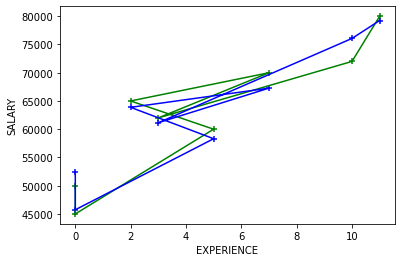

In [15]:
%matplotlib inline
plt.xlabel('EXPERIENCE')
plt.ylabel('SALARY')

plt.scatter(df.experience,df['salary($)'],color= 'green',marker = '+') 
plt.plot(df.experience,df['salary($)'],color= 'green') 

plt.scatter(df.experience,df.predictions,color= 'blue',marker = '+') 
plt.plot(df.experience,df.predictions,color= 'blue')

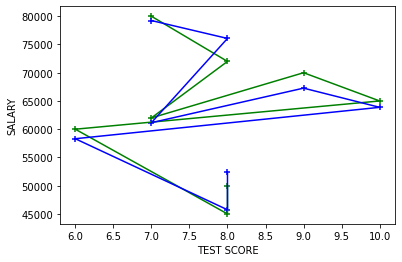

In [16]:
%matplotlib inline
plt.xlabel('TEST SCORE')
plt.ylabel('SALARY')

plt.scatter(df['test_score(out of 10)'],df['salary($)'],color= 'green',marker = '+') 
plt.plot(df['test_score(out of 10)'],df['salary($)'],color= 'green') 

plt.scatter(df['test_score(out of 10)'],df.predictions,color= 'blue',marker = '+')
plt.plot(df['test_score(out of 10)'],df.predictions,color= 'blue') 

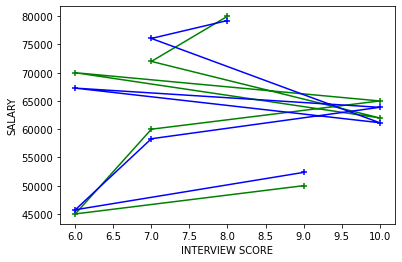

In [17]:
%matplotlib inline
plt.xlabel('INTERVIEW SCORE')
plt.ylabel('SALARY')

plt.scatter(df['interview_score(out of 10)'],df['salary($)'],color= 'green',marker = '+') 
plt.plot(df['interview_score(out of 10)'],df['salary($)'],color= 'green') 

plt.scatter(df['interview_score(out of 10)'],df.predictions,color= 'blue',marker = '+')
plt.plot(df['interview_score(out of 10)'],df.predictions,color= 'blue') 